In [2]:
import pandas as pd
df=pd.read_csv("Pune house data.csv")
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [5]:
df.shape

(13320, 9)

In [7]:
df2=df.drop(['area_type','availability','society'],axis='columns')
df2.head()

,size,total_sqft,bath,balcony,price,site_location
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,3 BHK,1521,3.0,1.0,95.00,Aundh
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [10]:
df2.isnull().sum()

size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [12]:
df3=df2.dropna()
df3.isnull().sum() #droppped all the null rows

size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [22]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [24]:
df3['bhk']=df3['size'].apply(lambda x:int(str(x).split(' ')[0]))
df3.head()

<ipython-input-24-6b746573e646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(str(x).split(' ')[0]))


,size,total_sqft,bath,balcony,price,site_location,bhk
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,1.0,95.00,Aundh,3
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road,2


In [26]:
df3['bhk'].unique() #so here 27 and 43 bkh is impossible so it it an error

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [28]:
df3['total_sqft'].unique() #so the - will create an error

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [33]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,size,total_sqft,bath,balcony,price,site_location,bhk
30,4 BHK,2100 - 2850,4.0,0.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,0.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,0.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,0.0,56.800,Wakadewadi,2
410,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,Ganeshkhind,1
549,2 BHK,1195 - 1440,2.0,0.0,63.770,Prabhat Road,2
661,2 BHK,1120 - 1145,2.0,0.0,48.130,Tilak Road,2
672,4 Bedroom,3090 - 5002,4.0,0.0,445.000,Alandi Road,4
772,2 BHK,1160 - 1195,2.0,0.0,59.935,Aundh Road,2


In [35]:
def sqft_corr(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [37]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(sqft_corr)
df4.head()


,size,total_sqft,bath,balcony,price,site_location,bhk
0,2 BHK,1056.0,2.0,1.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440.0,2.0,3.0,62.00,Anandnagar,3
3,3 BHK,1521.0,3.0,1.0,95.00,Aundh,3
4,2 BHK,1200.0,2.0,1.0,51.00,Aundh Road,2


In [40]:
df4[~df4['total_sqft'].apply(is_float)].head()


,size,total_sqft,bath,balcony,price,site_location,bhk


In [42]:
df4.shape

(12710, 7)

In [45]:
df4.loc[410]

size                   1 BHK
total_sqft               NaN
bath                     1.0
balcony                  0.0
price                   18.5
site_location    Ganeshkhind
bhk                        1
Name: 410, dtype: object

In [47]:
df4.isnull().sum()


size              0
total_sqft       42
bath              0
balcony           0
price             0
site_location     0
bhk               0
dtype: int64

In [50]:
df4=df4.dropna()
df4.shape

(12668, 7)

In [52]:
df4['bhk'].unique()



array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [54]:
def bhk_corr(x):
    if x>15:
        return None
    else:
        return x

In [56]:
df4['bhk']=df4['bhk'].apply(bhk_corr)
df4.isnull().sum()

size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
bhk              2
dtype: int64

In [58]:
df5=df4.dropna()
df5.shape

(12666, 7)

In [70]:
def to_float(x):
    try:
        return float(x)
    except:
        return None
    
    



In [77]:
df['price']=df5['price'].apply(to_float)
df['total_sqft']=df5['total_sqft'].apply(to_float)

In [79]:
df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']
df5.head()

<ipython-input-79-1d8316393fd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']


,size,total_sqft,bath,balcony,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,1.0,39.07,Alandi Road,2.0,3699.810606
1,4 Bedroom,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4.0,4615.384615
2,3 BHK,1440.0,2.0,3.0,62.00,Anandnagar,3.0,4305.555556
3,3 BHK,1521.0,3.0,1.0,95.00,Aundh,3.0,6245.890861
4,2 BHK,1200.0,2.0,1.0,51.00,Aundh Road,2.0,4250.000000


In [81]:
df5.site_location.unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Bhandarkar Road', 'Bibvewadi',
       'Bopodi', 'Budhwar Peth', 'Bund Garden Road', 'Camp',
       'Chandan Nagar', 'Dapodi', 'Deccan Gymkhana', 'Dehu Road',
       'Dhankawadi', 'Dhayari Phata', 'Dhole Patil Road', 'Erandwane',
       'Fatima Nagar', 'Fergusson College Road', 'Ganesh Peth',
       'Ganeshkhind', 'Ghorpade Peth', 'other', 'Gokhale Nagar',
       'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Mukund Nagar', 'Mundhawa',
       'Nagar Road', 'Nana Peth', 'Narayan Peth', 'Narayangaon',
       'Navi Peth', 'Padmavati', 'Par

In [83]:
len(df5.site_location.unique()) #as the length is less so there is no dimentionality curse

97

In [85]:
df5.site_location=df5.site_location.apply(lambda x : x.strip())#this will remobve extra spaces from thront and back

In [88]:
df5[df5.total_sqft/df5.bhk<300].head() #a standard room cannot be this small

,size,total_sqft,bath,balcony,price,site_location,bhk,price_per_sqft
58,6 Bedroom,1407.0,4.0,1.0,150.0,Mundhawa,6.0,10660.980810
68,8 Bedroom,1350.0,7.0,0.0,85.0,Pirangut,8.0,6296.296296
70,3 Bedroom,500.0,3.0,2.0,100.0,Pune Railway Station,3.0,20000.000000
78,2 BHK,460.0,1.0,0.0,22.0,Senapati Bapat Road,2.0,4782.608696
89,6 Bedroom,710.0,6.0,3.0,160.0,Viman Nagar,6.0,22535.211268


In [89]:
df5.shape

(12666, 8)

In [93]:
df6=df5[~(df5.total_sqft/df5.bhk<300)] #a standard room cannot be this small
df6.shape

(12013, 8)

In [95]:
df6.price_per_sqft.describe() #so here we get to know that there are outliers

count     12013.000000
mean       6206.213093
std        3985.465773
min         267.829813
25%        4199.565960
50%        5253.456221
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [98]:
import numpy as np

In [103]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10461, 8)

In [109]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

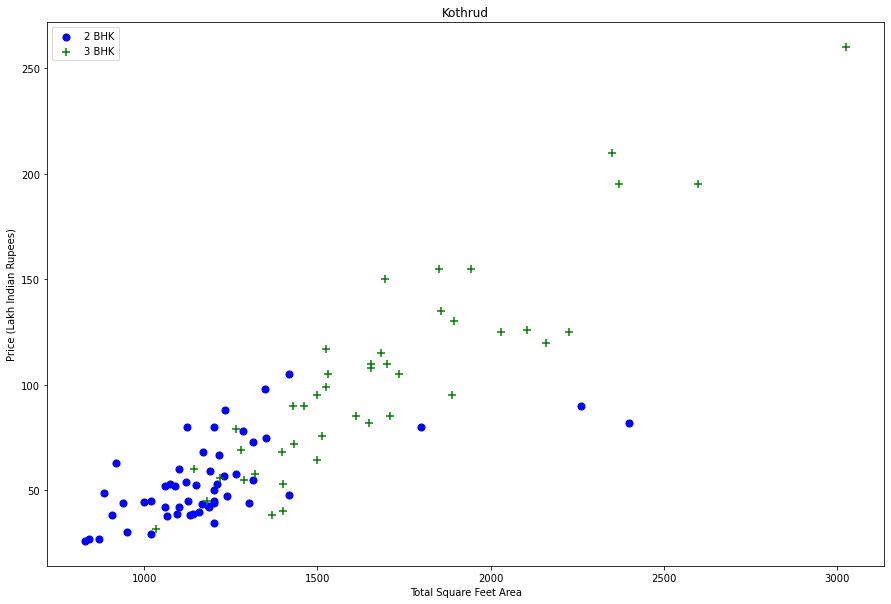

In [112]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    #matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Kothrud")

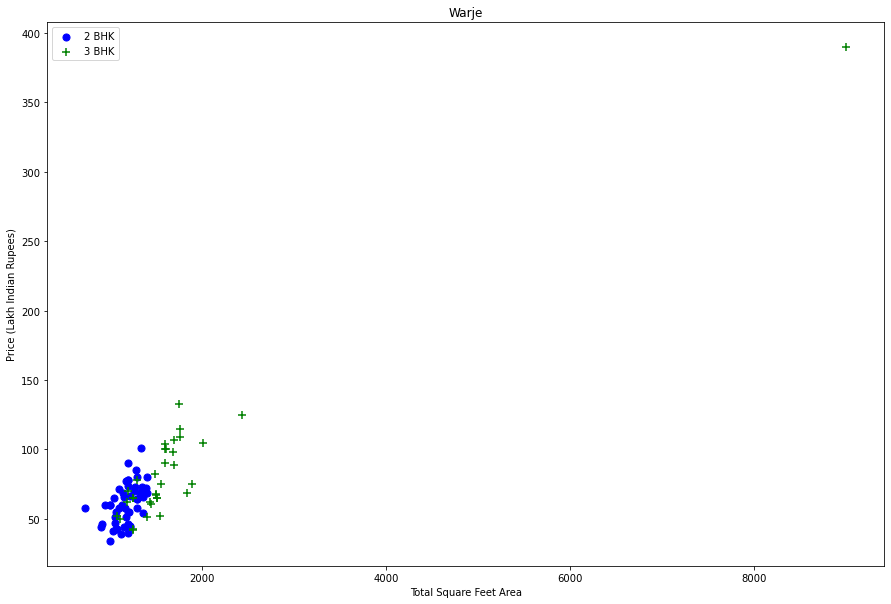

In [120]:
plot_scatter_chart(df7,'Warje')

In [116]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7341, 8)

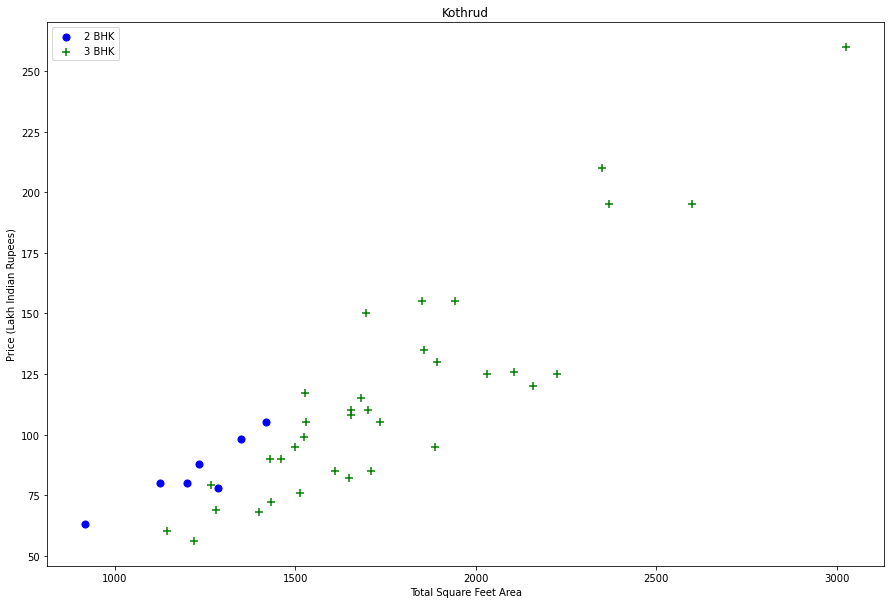

In [118]:
plot_scatter_chart(df8,'Kothrud')

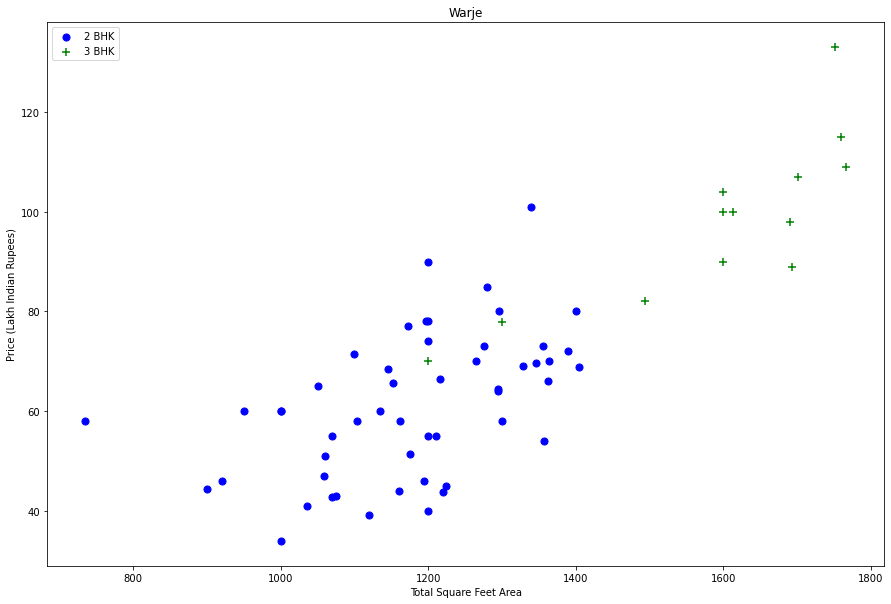

In [121]:
plot_scatter_chart(df8,'Warje')

Text(0, 0.5, 'Count')

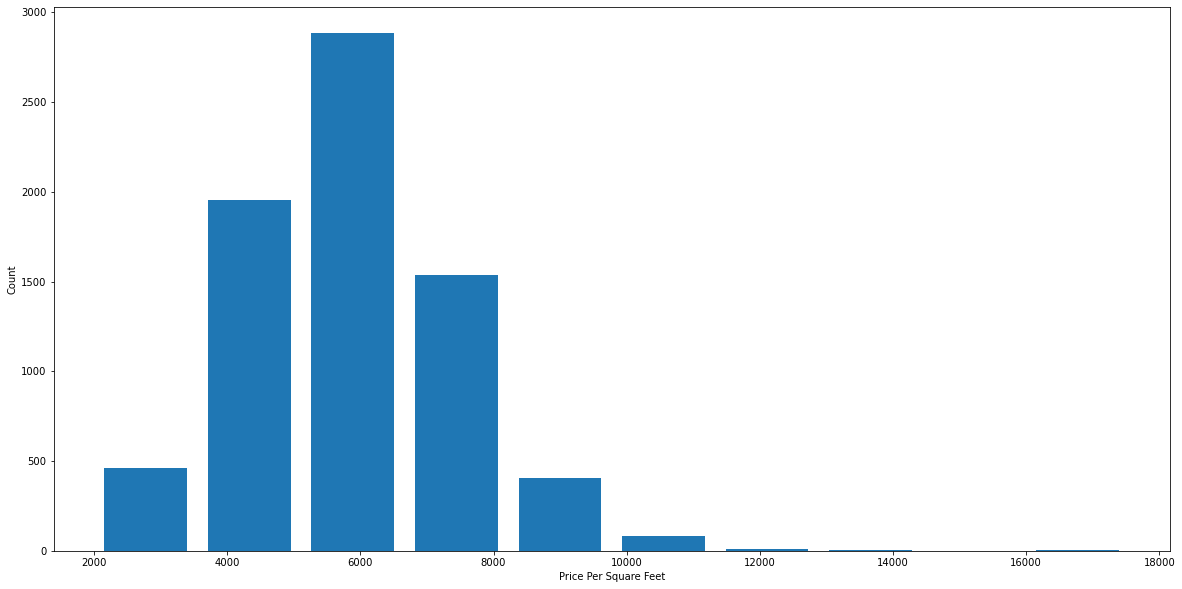

In [123]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [125]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  1.,  6.,  7.,  8.,  9., 13.])

Text(0, 0.5, 'Count')

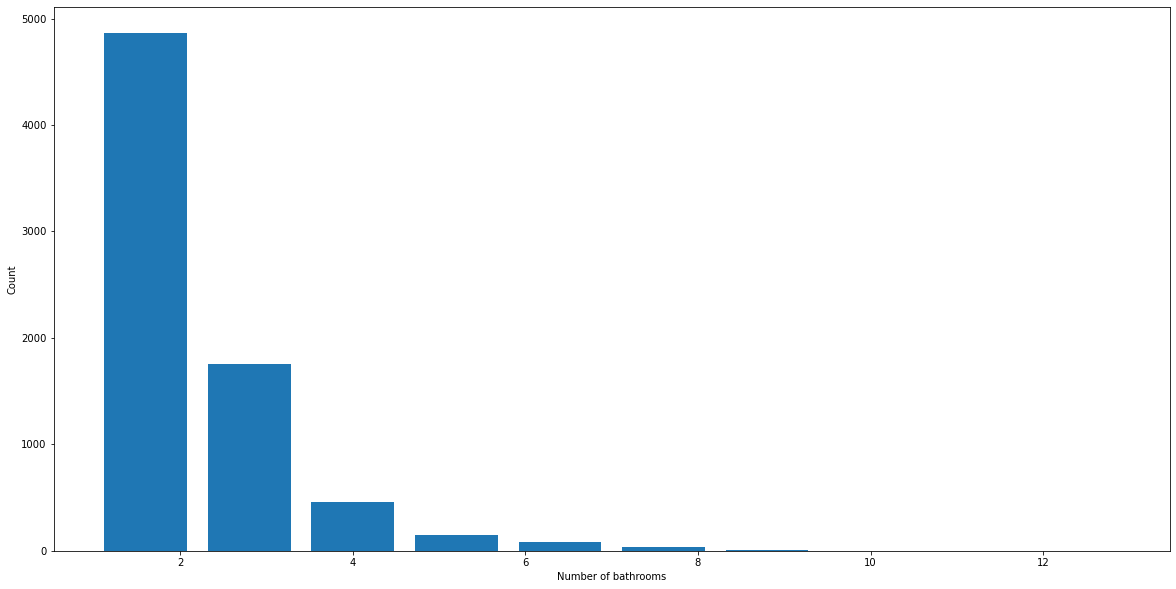

In [127]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [129]:
df9=df8[df8.bath<(df8.bhk+2)]
df9.shape

(7286, 8)

In [131]:
df9.head()

,size,total_sqft,bath,balcony,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,1.0,39.07,Alandi Road,2.0,3699.810606
1,4 Bedroom,2894.0,4.0,1.0,245.00,Alandi Road,4.0,8465.791292
2,2 BHK,1084.0,2.0,2.0,50.00,Alandi Road,2.0,4612.546125
3,2 BHK,1230.0,2.0,2.0,80.00,Alandi Road,2.0,6504.065041
4,3 BHK,1750.0,3.0,2.0,130.00,Alandi Road,3.0,7428.571429


In [134]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,total_sqft,bath,balcony,price,site_location,bhk
0,1056.0,2.0,1.0,39.07,Alandi Road,2.0
1,2894.0,4.0,1.0,245.00,Alandi Road,4.0
2,1084.0,2.0,2.0,50.00,Alandi Road,2.0
3,1230.0,2.0,2.0,80.00,Alandi Road,2.0
4,1750.0,3.0,2.0,130.00,Alandi Road,3.0


,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,total_sqft,bath,balcony,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,1.0,39.07,Alandi Road,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,1.0,245.00,Alandi Road,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2.0,50.00,Alandi Road,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2.0,80.00,Alandi Road,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,2.0,130.00,Alandi Road,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df12 = df11.drop('site_location','',axis='columns')
df12.head()

,total_sqft,bath,balcony,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,1.0,39.07,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,1.0,245.00,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2.0,50.00,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2.0,80.00,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,2.0,130.00,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
print(df12.shape)
X = df12.drop(['price'],axis='columns')
X.head(3)

(7286, 101)


,total_sqft,bath,balcony,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,1.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,1.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X.shape


(7286, 100)

In [150]:
y = df12.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [154]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8190001638306341

In [156]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81866994, 0.85413152, 0.81729972, 0.80862479, 0.78917649])

In [158]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818886,{'normalize': True}
1,lasso,0.818880,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.724645,"{'criterion': 'mse', 'splitter': 'random'}"


In [160]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

predict_price('Hadapsar',1000, 2, 2)

54.288700103759766

In [162]:
predict_price('Kothrud',1000, 2, 2)

66.7882308959961

In [164]:
predict_price('Sadashiv Peth',1000, 2, 2)

54.49677276611328

In [166]:
predict_price('Wagholi',1000, 2, 2)

52.2244987487793

In [168]:
import pickle
with open('pune_homeprices.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [169]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))